<div style="display:block">
<div style="width: 10%; display: inline-block; text-align: left;">
<img src="
http://upload.wikimedia.org/wikipedia/en/0/0c/Mu_Sigma_Logo.jpg"
style="height:75px; margin-left:0px" />
</div>
<div style="width: 69%; display: inline-block">
<h5  style="color:maroon; text-align: center; font-size:25px;">Bricks - Solution Model for Predicting High TMB Status</h5>
<div style="width: 90%; text-align: center; display: inline-block;"><i>Author(s): </i> <strong>   Pradyumna K, Rakshitha MS , Surya Regalla, Akash Singh, Bhumika Tuli, Vinanth Kumar </strong> </div>
</div>
<div style="width: 20%; text-align: right; display: inline-block;">
<div style="width: 100%; text-align: left; display: inline-block;">
<i>Modified: November 8, 2024</i>
</div>
</div>
</div>

## Importing all the modules and packages

In [1]:


import pandas as pd
import numpy as np                     
import matplotlib.pyplot as plt             
%matplotlib inline     
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
pip install --upgrade scikit-learn numpy


Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.5.2-cp310-cp310-win_amd64.whl (11.0 MB)
  Using cached numpy-2.1.3-cp310-cp310-win_amd64.whl (12.9 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install mlxtend


Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install catboost


Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [6]:
file_path =r"C:\Users\Vinanthkumar.HS\OneDrive - Mu Sigma Business Solutions Pvt. Ltd\Desktop\sprint deliverables\Pavithra-Ramkumar_Problemspace_data.xlsx"
sheet_name = 'Raw Data' 

df = pd.read_excel(file_path, sheet_name=sheet_name)
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Patient_ID,histology,groupstage,smokingstatus,practicetype,gender,ethnicity,race,age_idx,ecog_value,...,vital_res_5,vital_res_6,vital_res_7,vital_res_8,biomarkers_1,biomarkers_2,biomarkers_3,biomarkers_4,biomarkers_5,tmb_status
0,P1,Squamous cell carcinoma,Stage IV,History of smoking,COMMUNITY,M,EUR,White,72,3.0,...,18,2.05,37,0.000000,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,Low
1,P2,Squamous cell carcinoma,Stage IV,History of smoking,COMMUNITY,M,EUR,White,47,3.0,...,18,2.05,37,0.000000,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,Low
2,P3,NSCLC histology NOS,Stage IV,History of smoking,COMMUNITY,M,NaN,White,61,0.0,...,18,2.05,37,60.696495,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,Low
3,P4,Non-squamous cell carcinoma,Stage IV,History of smoking,COMMUNITY,M,EUR,White,82,0.0,...,18,2.05,37,24.216821,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,Low
4,P5,Non-squamous cell carcinoma,Stage IV,History of smoking,ACADEMIC,M,NaN,White,67,3.0,...,18,2.05,37,0.000000,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,Low


## Renaming the lab res and vital signs to their respectives

In [7]:
df.columns = df.columns.str.capitalize()

df = df.rename(columns={
    'Vital_res_0': 'DBP', 
    'Vital_res_1': 'Heart rate', 
    'Vital_res_2': 'SBP', 
    'Vital_res_3': 'Pain', 
    'Vital_res_4': 'oxygen saturation', 
    'Vital_res_5': 'Respiratory rate', 
    'Vital_res_6': 'BSA', 
    'Vital_res_7': 'Body temp', 
    'Vital_res_8': 'BMI'
})
df = df.rename(columns = {
    'Lab_res_0': 'ALP',
    'Lab_res_1': 'Albumin',
    'Lab_res_2': 'Bilirubin',
    'Lab_res_3': 'Hematocrit',
    'Lab_res_4': 'Hemoglobin',
    'Lab_res_5': 'Urea Nitrogen',
    'Lab_res_6': 'Calcium',
    'Lab_res_7': 'Creatinine',
    'Lab_res_8': 'Protein'
})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5158 entries, 0 to 5157
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_id         5158 non-null   object 
 1   Histology          5158 non-null   object 
 2   Groupstage         5158 non-null   object 
 3   Smokingstatus      5158 non-null   object 
 4   Practicetype       5158 non-null   object 
 5   Gender             5158 non-null   object 
 6   Ethnicity          4464 non-null   object 
 7   Race               4799 non-null   object 
 8   Age_idx            5158 non-null   int64  
 9   Ecog_value         2896 non-null   float64
 10  ALP                5158 non-null   int64  
 11  Albumin            5158 non-null   int64  
 12  Bilirubin          5158 non-null   int64  
 13  Hematocrit         5158 non-null   int64  
 14  Hemoglobin         5158 non-null   int64  
 15  Urea Nitrogen      5158 non-null   int64  
 16  Calcium            5158 

## Filling missing values - (Ethnicity, Race, Ecog values)

In [9]:
df['Ethnicity'] = df['Ethnicity'].fillna(method='ffill')
most_frequent_race = df.groupby('Tmb_status')['Race'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

# imputing race missing values based on tmb status
def impute_race(row):
    if pd.isnull(row['Race']):
        return most_frequent_race[row['Tmb_status']]
    return row['Race']

df['Race'] = df.apply(impute_race, axis=1)

# fill ecog missing values based on groupstage
def fill_ecog_value(row):
    groupstage = row['Groupstage']
    if pd.isnull(row['Ecog_value']):  
        if groupstage == 'Stage IV':
            return 3
        elif groupstage in ['Stage III', 'Stage IIIA', 'Stage IIIB']:
            return 2
        elif groupstage in ['Stage II', 'Stage IIA', 'Stage IIB']:
            return 2
        elif groupstage in ['Stage I', 'Stage IA', 'Stage IB']:
            return 1
        elif groupstage == 'Occult':
            return 0
        elif groupstage == 'Group stage is not reported':
            return 'Unknown'
    return row['Ecog_value']  
 
df['Ecog_value'] = df.apply(fill_ecog_value, axis=1)

In [10]:
df.isnull().sum()

Patient_id           0
Histology            0
Groupstage           0
Smokingstatus        0
Practicetype         0
Gender               0
Ethnicity            0
Race                 0
Age_idx              0
Ecog_value           0
ALP                  0
Albumin              0
Bilirubin            0
Hematocrit           0
Hemoglobin           0
Urea Nitrogen        0
Calcium              0
Creatinine           0
Protein              0
DBP                  0
Heart rate           0
SBP                  0
Pain                 0
oxygen saturation    0
Respiratory rate     0
BSA                  0
Body temp            0
BMI                  0
Biomarkers_1         0
Biomarkers_2         0
Biomarkers_3         0
Biomarkers_4         0
Biomarkers_5         0
Tmb_status           0
dtype: int64

## Cleaning the data by replacing Unknown / Not intrepreted values

In [11]:
df['Groupstage'].replace({'Group stage is not reported': 'Stage IA', 'Occult': 'Stage IA'}, inplace=True)
df['Smokingstatus'].replace({'Unknown/Not documented': 'No history of smoking'}, inplace=True)
df['Ecog_value'].replace({'Unknown': 1.0}, inplace=True)
df['Biomarkers_1'].replace({'UNKNOWN': 'NEGATIVE', 'PENDING': 'NEGATIVE', 'NO INTERPRETATION': 'NEGATIVE', 'UNSUCCESSFUL': 'NEGATIVE'}, inplace=True)
biomarker_columns = ['Biomarkers_2', 'Biomarkers_3', 'Biomarkers_4', 'Biomarkers_5']
for column in biomarker_columns:
    df[column].replace({'UNK': 'NEGATIVE'}, inplace=True)

## Data distribution % for all Categorical Columns

In [12]:
categorical_columns = ['Histology', 'Groupstage', 'Practicetype', 'Race', 'Smokingstatus','Biomarkers_1',
       'Biomarkers_2', 'Biomarkers_3', 'Biomarkers_4', 'Biomarkers_5',
       'Tmb_status']
 
for column in categorical_columns:
    print(f"Balance percentage for {column}:")
    balance_percentage = df[column].value_counts(normalize=True) * 100 
    print(balance_percentage)
    print("\n")

Balance percentage for Histology:
Non-squamous cell carcinoma    75.184180
Squamous cell carcinoma        20.259791
NSCLC histology NOS             4.556029
Name: Histology, dtype: float64


Balance percentage for Groupstage:
Stage IV      56.863125
Stage IIIA    12.795657
Stage IIIB     7.599845
Stage IA       7.328422
Stage IB       4.245832
Stage IIA      3.722373
Stage IIB      3.586661
Stage III      1.783637
Stage I        1.473439
Stage II       0.601008
Name: Groupstage, dtype: float64


Balance percentage for Practicetype:
COMMUNITY    92.031795
ACADEMIC      7.968205
Name: Practicetype, dtype: float64


Balance percentage for Race:
White                        82.590151
Other Race                    8.840636
Black or African American     5.893757
Asian                         2.559131
Hispanic or Latino            0.116324
Name: Race, dtype: float64


Balance percentage for Smokingstatus:
History of smoking       81.271811
No history of smoking    18.728189
Name: Smokingstatu

## Encoding the Categorical columns
We can only apply SMOTE for numerical data.


**Encoding** is the process of converting categorical data (like text labels) into a numerical format so that it can be used effectively in machine learning models. Machine learning algorithms typically work better with numerical data because they rely on mathematical computations, and categorical data (like "Yes"/"No" or "Red"/"Blue"/"Green") needs to be transformed to be interpreted correctly by these models.

**OneHotEncoding** for **Histology** as it's unordered category \
**OrdinalEncoding** for **GroupStage** as it's in a sequence. \
**LabelEncoding** for remaining others (simple binary categories only bruh)

In [13]:
df_encoded = df.copy()

label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse_output=False) 

# 1. Binary Encoding for Binary Columns
df_encoded['Smokingstatus'] = label_encoder.fit_transform(df_encoded['Smokingstatus'])
df_encoded['Tmb_status'] = label_encoder.fit_transform(df_encoded['Tmb_status'])
df_encoded['Practicetype'] = label_encoder.fit_transform(df_encoded['Practicetype'])
df_encoded['Gender'] = label_encoder.fit_transform(df_encoded['Gender'])

# 2. Ordinal Encoding for Groupstage
groupstage_order = [
    "Stage I", "Stage IA", "Stage IB", "Stage II", "Stage IIA", "Stage IIB",
    "Stage III", "Stage IIIA", "Stage IIIB", "Stage IV"
]
ordinal_encoder = OrdinalEncoder(categories=[groupstage_order])
df_encoded['Groupstage'] = ordinal_encoder.fit_transform(df_encoded[['Groupstage']])

# 3. One-Hot Encoding for Multi-Category Column
encoded_histology = pd.DataFrame(one_hot_encoder.fit_transform(df_encoded[['Histology']]),
                                 columns=one_hot_encoder.get_feature_names_out(['Histology']))

df_encoded = pd.concat([df_encoded.drop(columns=['Histology']), encoded_histology], axis=1)

# 4. Label Encoding for Biomarkers Columns
biomarker_columns = ['Biomarkers_1', 'Biomarkers_2', 'Biomarkers_3', 'Biomarkers_4', 'Biomarkers_5']
for col in biomarker_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

### Dropping columns which are unnecessary

In [14]:
df_encoded.drop('Patient_id', axis=1, inplace=True)
df_encoded.drop('Ethnicity', axis=1, inplace=True)
df_encoded.drop('Race', axis=1, inplace=True)
df_encoded.drop('DBP', axis=1, inplace=True)
df_encoded.drop('SBP', axis=1, inplace=True)
df_encoded.drop('Heart rate', axis=1, inplace=True)
df_encoded.drop('Pain', axis=1, inplace=True)
df_encoded.drop('oxygen saturation', axis=1, inplace=True)
df_encoded.drop('Respiratory rate', axis=1, inplace=True)
df_encoded.drop('BSA', axis=1, inplace=True)
df_encoded.drop('Body temp', axis=1, inplace=True)
df_encoded.drop('BMI', axis=1, inplace=True)

In [15]:
df_encoded.columns

Index(['Groupstage', 'Smokingstatus', 'Practicetype', 'Gender', 'Age_idx',
       'Ecog_value', 'ALP', 'Albumin', 'Bilirubin', 'Hematocrit', 'Hemoglobin',
       'Urea Nitrogen', 'Calcium', 'Creatinine', 'Protein', 'Biomarkers_1',
       'Biomarkers_2', 'Biomarkers_3', 'Biomarkers_4', 'Biomarkers_5',
       'Tmb_status', 'Histology_NSCLC histology NOS',
       'Histology_Non-squamous cell carcinoma',
       'Histology_Squamous cell carcinoma'],
      dtype='object')

In [16]:
df_encoded.head()

,Groupstage,Smokingstatus,Practicetype,Gender,Age_idx,Ecog_value,ALP,Albumin,Bilirubin,Hematocrit,...,Protein,Biomarkers_1,Biomarkers_2,Biomarkers_3,Biomarkers_4,Biomarkers_5,Tmb_status,Histology_NSCLC histology NOS,Histology_Non-squamous cell carcinoma,Histology_Squamous cell carcinoma
0,9.0,0,1,1,72,3.0,3,3,3,3,...,0,1,1,1,1,1,1,0.0,0.0,1.0
1,9.0,0,1,1,47,3.0,3,3,3,3,...,0,1,1,1,1,1,1,0.0,0.0,1.0
2,9.0,0,1,1,61,0.0,3,3,3,3,...,0,1,1,1,1,1,1,1.0,0.0,0.0
3,9.0,0,1,1,82,0.0,3,3,3,3,...,0,1,1,1,1,1,1,0.0,1.0,0.0
4,9.0,0,0,1,67,3.0,3,3,3,3,...,0,1,1,1,1,1,1,0.0,1.0,0.0


### Data distribution % after Encoding categorical columns

In [17]:
categorical_columns = ['Histology_NSCLC histology NOS', 'Histology_Non-squamous cell carcinoma',
                       'Histology_Squamous cell carcinoma', 'Groupstage', 'Smokingstatus','Biomarkers_1',
       'Biomarkers_2', 'Biomarkers_3', 'Biomarkers_4', 'Biomarkers_5','Gender', 'Ecog_value', 'Tmb_status']
 
for column in categorical_columns:
    print(f"Balance percentage for {column}:")
    balance_percentage = df_encoded[column].value_counts(normalize=True) * 100 
    print(balance_percentage)
    print("\n")

Balance percentage for Histology_NSCLC histology NOS:
0.0    95.443971
1.0     4.556029
Name: Histology_NSCLC histology NOS, dtype: float64


Balance percentage for Histology_Non-squamous cell carcinoma:
1.0    75.18418
0.0    24.81582
Name: Histology_Non-squamous cell carcinoma, dtype: float64


Balance percentage for Histology_Squamous cell carcinoma:
0.0    79.740209
1.0    20.259791
Name: Histology_Squamous cell carcinoma, dtype: float64


Balance percentage for Groupstage:
9.0    56.863125
7.0    12.795657
8.0     7.599845
1.0     7.328422
2.0     4.245832
4.0     3.722373
5.0     3.586661
6.0     1.783637
0.0     1.473439
3.0     0.601008
Name: Groupstage, dtype: float64


Balance percentage for Smokingstatus:
0    81.271811
1    18.728189
Name: Smokingstatus, dtype: float64


Balance percentage for Biomarkers_1:
0    63.008918
1    36.991082
Name: Biomarkers_1, dtype: float64


Balance percentage for Biomarkers_2:
0    66.459868
1    33.540132
Name: Biomarkers_2, dtype: float64


## SMOTE - TOMEK 
SMOTE (**Synthetic Minority Over-sampling Technique**) and **Tomek** Links—to address class imbalance in datasets effectively. \
For each instance 𝑥 in the minority class, select 𝑘 nearest neighbors from the same class. \
For each neighbor $x_{\text{neighbor}}$, create synthetic points along the line between x and $x_{\text{neighbor}}$. \
<br>
**Formula:**
$x_{\text{new}} = x + \delta \times (x_{\text{neighbor}} - x)$

where $\delta$ is a random number between 0 and 1.

**SMOTE TOMEK** method first applies SMOTE to oversample the minority class by generating synthetic samples, then uses Tomek Links to clean up overlapping samples between classes, thus helping in balancing the dataset while potentially improving class separation.

A Tomek link exists if two instances (𝑥,𝑦) from different classes are each other’s nearest neighbor. Such pairs are likely on the class boundary and may confuse the model. Removing Tomek links cleans up overlapping samples.
<br>
If the nearest neighbor of minority class point 𝑥 is a majority class point 𝑦, and 𝑦’s nearest neighbor is 𝑥, they form a Tomek link.

In [18]:
X = df_encoded.drop(columns=['Tmb_status']) 
y = df_encoded['Tmb_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

print("Balance after SMOTE-Tomek:")
print(y_train_resampled.value_counts())
print("New shape of training data:", X_train_resampled.shape, y_train_resampled.shape)

Balance after SMOTE-Tomek:
1    3635
0    3635
Name: Tmb_status, dtype: int64
New shape of training data: (7270, 23) (7270,)


# Feature Selection 
Feature Selection technique takes in consideration subset of those features which are important or to eliminate those features which do not help classify our target.

## Forward Selection
Begins with no features and adds them one by one, based on their contribution to improving the model's performance.

In [19]:
clf = RandomForestClassifier(random_state=42)

sfs = SFS(clf, 
          k_features='best',  # 'best' for automatic selection
          forward=True, 
          floating=False, 
          scoring='accuracy', 
          cv=5)

sfs = sfs.fit(X_train_resampled, y_train_resampled)

selected_features = list(sfs.k_feature_names_)
print("Selected features:", selected_features)

X_train_selected_forward = sfs.transform(X_train_resampled)
X_test_selected_forward = sfs.transform(X_test)

Selected features: ['Groupstage', 'Practicetype', 'Gender', 'Age_idx', 'Albumin', 'Hematocrit', 'Hemoglobin', 'Urea Nitrogen', 'Biomarkers_1', 'Biomarkers_2', 'Biomarkers_3', 'Biomarkers_4', 'Biomarkers_5']


## Backward Elimination
Starts with all features and removes them one by one, based on the least contribution.

In [40]:
sfs_backward = SFS(clf,
                   k_features='best',  
                   forward=False,  
                   floating=False, 
                   scoring='accuracy', 
                   cv=5)  

sfs_backward = sfs_backward.fit(X_train_resampled, y_train_resampled)

selected_features_backward = X_train_resampled.columns[list(sfs_backward.k_feature_idx_)]
print("Selected Features (Backward Elimination):", selected_features_backward)

X_train_selected_backward = sfs_backward.transform(X_train_resampled)
X_test_selected_backward = sfs_backward.transform(X_test)

Selected Features (Backward Elimination): Index(['Groupstage', 'Practicetype', 'Gender', 'Age_idx', 'Albumin',
       'Bilirubin', 'Hemoglobin', 'Urea Nitrogen', 'Calcium', 'Biomarkers_1',
       'Biomarkers_3', 'Biomarkers_4', 'Biomarkers_5'],
      dtype='object')


In [41]:
df_encoded.columns

Index(['Groupstage', 'Smokingstatus', 'Practicetype', 'Gender', 'Age_idx',
       'Ecog_value', 'ALP', 'Albumin', 'Bilirubin', 'Hematocrit', 'Hemoglobin',
       'Urea Nitrogen', 'Calcium', 'Creatinine', 'Protein', 'Biomarkers_1',
       'Biomarkers_2', 'Biomarkers_3', 'Biomarkers_4', 'Biomarkers_5',
       'Tmb_status', 'Histology_NSCLC histology NOS',
       'Histology_Non-squamous cell carcinoma',
       'Histology_Squamous cell carcinoma'],
      dtype='object')

## CatBoost model training

**Standard gradient boosting** trains a series of weak learners (typically decision trees), where each tree attempts to correct the errors of the previous trees. The errors are reduced by gradually improving the model’s performance through weighted adjustments.

**CatBoost** is specifically designed to handle categorical data efficiently. It can directly manage categorical columns, learning optimal splits based on their distributions. With balanced and encoded data, CatBoost might still provide a slight performance edge for features that originally held strong categorical significance. It’s also optimized for handling complex interactions, which can help if you have intricate patterns within your data. CatBoost uses a unique technique called ordered boosting, which reduces overfitting and results in better generalization on new data.

In [42]:
catboost_model = CatBoostClassifier(random_seed=42, verbose=0) 
catboost_model.fit(X_train_selected_forward, y_train_resampled)

y_pred = catboost_model.predict(X_test_selected_forward)
accuracy = accuracy_score(y_test, y_pred)

print("*********** Forward Selection ***********\n")
print("CatBoost Model Accuracy with Selected Features:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

*********** Forward Selection ***********

CatBoost Model Accuracy with Selected Features: 0.935077519379845

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.94      0.77       122
           1       0.99      0.93      0.96       910

    accuracy                           0.94      1032
   macro avg       0.82      0.94      0.87      1032
weighted avg       0.95      0.94      0.94      1032



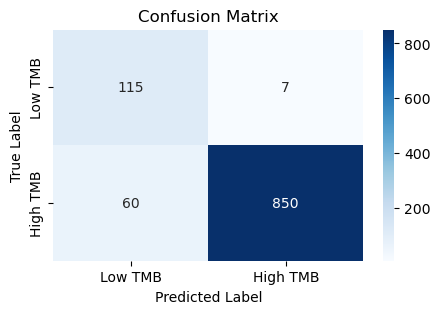

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Low TMB", "High TMB"], yticklabels=["Low TMB", "High TMB"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [44]:
catboost_model_backward = CatBoostClassifier(random_seed=42, verbose=0)
catboost_model_backward.fit(X_train_selected_backward, y_train_resampled)

y_pred_backward = catboost_model_backward.predict(X_test_selected_backward)
accuracy = accuracy_score(y_test, y_pred_backward)

print("*********** Backward Elimination ***********\n")
print("CatBoost Model Accuracy with Selected Features:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_backward))

*********** Backward Elimination ***********

CatBoost Model Accuracy with Selected Features: 0.9341085271317829

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.93      0.77       122
           1       0.99      0.93      0.96       910

    accuracy                           0.93      1032
   macro avg       0.82      0.93      0.87      1032
weighted avg       0.95      0.93      0.94      1032



## Evaluation Metrics

- **Precision:** Measures how accurate positive predictions are. Out of all predictions for a class (e.g., high TMB), how many are actually correct?  
- **Recall:** Measures how well the model finds all positive instances of a class. Out of all actual instances of a class, how many did the model correctly identify? 
- **F1 Score:** A balance between precision and recall, useful when classes are imbalanced. The F1 score gives an overall measure of a model’s accuracy for each class, considering both precision and recall. 
- **Support:** The number of actual instances of each class in the test set. ( Ex. Support of 122 for class 0 means there were 122 true low TMB cases in the data.) 
- **Accuracy:** The overall correctness of the model, representing how many total predictions were correct. Out of all predictions made, what percentage were right? 
- **Macro Avg (Macro Average):** An average of precision, recall, and F1 scores for each class, treating all classes equally. (Example: The macro average F1 score of 0.87 means that, on average, each class has an F1 score of 87%.) 
- **Weighted Avg (Weighted Average):** An average that takes into account the number of instances (support) for each class. (Example: The weighted average F1 score of 0.94 reflects the overall balance, with class 1 (high TMB) contributing more due to its larger number of instances (support).)

## Hyperparameter Tuning
Hyperparameter tuning involves selecting the best set of parameters for a model to improve its performance.
- **Learning Rate:** Controls the step size at each iteration while moving toward a minimum of the loss function. Smaller values typically improve performance but require more trees.
- **Depth:** Maximum depth of the trees. Higher depths allow capturing more complex patterns, but too high may cause overfitting.
- **Iterations:** Number of boosting iterations. Higher values improve learning but may lead to overfitting if too large.
- **L2 Leaf Regularization:** Adds a penalty to leaf values to prevent overfitting. Higher values indicate stronger regularization.
- **Border Count:** Number of splits to consider for numerical features. Increasing can improve accuracy but increases computation.
- **Bagging Temperature:** Controls the sampling ratio for each iteration. Higher values introduce more randomness, which can help prevent overfitting.

In [45]:
param_grid = {
    'depth': [4, 6, 8], 
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 300],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0.0, 0.5, 1.0]
}

catboost_model = CatBoostClassifier(random_seed=42, verbose=0)

grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected_forward, y_train_resampled)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Best Parameters: {'bagging_temperature': 0.0, 'depth': 8, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Best Accuracy Score: 0.9624484181568087


In [46]:
best_catboost_model = grid_search.best_estimator_

best_catboost_model.fit(X_train_selected_forward, y_train_resampled)

y_pred_best = best_catboost_model.predict(X_test_selected_forward)

accuracy = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

Best Model Accuracy: 0.9341085271317829

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.92      0.77       122
           1       0.99      0.94      0.96       910

    accuracy                           0.93      1032
   macro avg       0.82      0.93      0.86      1032
weighted avg       0.95      0.93      0.94      1032



In [47]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=param_grid,
    n_iter=50,  
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train_selected_forward, y_train_resampled)

y_pred_random_search = random_search.best_estimator_.predict(X_test_selected_forward)

print("*********** Randomized Search with CatBoost ***********\n")
print("Best Parameters:", random_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_random_search))


*********** Randomized Search with CatBoost ***********

Best Parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 300, 'depth': 8, 'bagging_temperature': 1.0}

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.92      0.77       122
           1       0.99      0.94      0.96       910

    accuracy                           0.93      1032
   macro avg       0.82      0.93      0.86      1032
weighted avg       0.95      0.93      0.94      1032



## XGBoost model training
XGBoost is known for its robust gradient-boosting mechanism and efficient handling of large datasets, with strong generalization capabilities across various data types. It can work effectively with your balanced, encoded data and often performs exceptionally well with carefully engineered features.

In [48]:
xgboost_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgboost_model.fit(X_train_selected_forward, y_train_resampled)

y_predXG = xgboost_model.predict(X_test_selected_forward)
accuracy = accuracy_score(y_test, y_predXG)

print("*********** Forward Selection ***********\n")
print("XGBoost Model Accuracy with Selected Features:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_predXG))

*********** Forward Selection ***********

XGBoost Model Accuracy with Selected Features: 0.9341085271317829

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.93      0.77       122
           1       0.99      0.94      0.96       910

    accuracy                           0.93      1032
   macro avg       0.82      0.93      0.87      1032
weighted avg       0.95      0.93      0.94      1032



In [49]:
xgboost_model_backward = XGBClassifier(random_state=42, eval_metric='logloss')
xgboost_model_backward.fit(X_train_selected_backward, y_train_resampled)

y_pred_backwardXG = xgboost_model_backward.predict(X_test_selected_backward)
accuracy = accuracy_score(y_test, y_pred_backwardXG)

print("*********** Backward Elimination ***********\n")
print("XGBoost Model Accuracy with Selected Features:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_backwardXG))

*********** Backward Elimination ***********

XGBoost Model Accuracy with Selected Features: 0.935077519379845

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.93      0.77       122
           1       0.99      0.94      0.96       910

    accuracy                           0.94      1032
   macro avg       0.83      0.93      0.87      1032
weighted avg       0.95      0.94      0.94      1032



### Hyperparameter tuning for XGBoost

In [50]:
param_grid = {
    'max_depth': [3, 4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400],
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0],
    'subsample': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.5, 1.0, 1.5, 2.0]
}

xgboost_model = XGBClassifier(random_state=42, eval_metric='logloss')

random_search = RandomizedSearchCV(
    estimator=xgboost_model,
    param_distributions=param_grid,
    n_iter=50,  
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_selected_forward, y_train_resampled)

print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)
print("Best Accuracy Score from RandomizedSearchCV:", random_search.best_score_)

y_predXG_random = random_search.best_estimator_.predict(X_test_selected_forward)

accuracy = accuracy_score(y_test, y_predXG_random)
print("\n*********** XGBoost with RandomizedSearchCV ***********\n")
print("Model Accuracy with Best Parameters:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_predXG_random))


Best Parameters from RandomizedSearchCV: {'subsample': 0.7, 'reg_lambda': 2.0, 'reg_alpha': 0.1, 'n_estimators': 400, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 1.0}
Best Accuracy Score from RandomizedSearchCV: 0.9613480055020632

*********** XGBoost with RandomizedSearchCV ***********

Model Accuracy with Best Parameters: 0.9341085271317829

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.93      0.77       122
           1       0.99      0.94      0.96       910

    accuracy                           0.93      1032
   macro avg       0.82      0.93      0.87      1032
weighted avg       0.95      0.93      0.94      1032



## Random Forest model training

Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and combines their outputs for more accurate and stable predictions. \
<br>
**Key Features:**
- **Multiple Decision Trees:** Random Forest constructs several independent decision trees during training, each trained on a random subset of the data and features.
- **Voting/Averaging:** In classification tasks, each tree votes for a class, and the final prediction is the class with the most votes (majority voting). For regression, it averages the predictions from all trees.
- **Bagging:** This technique (Bootstrap Aggregating) involves randomly sampling data with replacement to create multiple training sets. Each tree gets a unique subset of the original data, adding to model diversity.
- **Feature Randomness:** To further reduce correlation between trees, each tree considers a random subset of features at each split, making the model less likely to overfit to noise in the data.

In [51]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected_forward, y_train_resampled)

y_pred_rf = rf_model.predict(X_test_selected_forward)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("*********** Forward Selection ***********\n")
print("RandomForest Model Accuracy with Selected Features:", accuracy_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

*********** Forward Selection ***********

RandomForest Model Accuracy with Selected Features: 0.9331395348837209

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.90      0.76       122
           1       0.99      0.94      0.96       910

    accuracy                           0.93      1032
   macro avg       0.82      0.92      0.86      1032
weighted avg       0.95      0.93      0.94      1032



In [52]:
rf_model_backward = RandomForestClassifier(random_state=42)
rf_model_backward.fit(X_train_selected_backward, y_train_resampled)

y_pred_rf_backward = rf_model_backward.predict(X_test_selected_backward)
accuracy_rf = accuracy_score(y_test, y_pred_rf_backward)

print("*********** Backward Elimination ***********\n")
print("RandomForest Model Accuracy with Selected Features:", accuracy_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_backward))

*********** Backward Elimination ***********

RandomForest Model Accuracy with Selected Features: 0.9312015503875969

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.89      0.75       122
           1       0.98      0.94      0.96       910

    accuracy                           0.93      1032
   macro avg       0.82      0.91      0.86      1032
weighted avg       0.95      0.93      0.94      1032



### Hyperparameter tuning for Random Forest Classifier

In [53]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [10, 20, 30, None],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples required at each leaf node
    'max_features': ['sqrt', 'log2', None], # Number of features to consider at each split
    'bootstrap': [True, False]              # Whether bootstrap samples are used when building trees
}

rf_model = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_selected_forward, y_train_resampled)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters for RandomForest:", best_params_rf)
print("Best Cross-Validated Accuracy Score:", best_score_rf)

best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test_selected_forward)

accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print("\n*********** Hyperparameter-Tuned RandomForest ***********\n")
print("RandomForest Model Accuracy with Tuned Hyperparameters:", accuracy_rf_tuned)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuned))


Best Parameters for RandomForest: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validated Accuracy Score: 0.9629986244841817

*********** Hyperparameter-Tuned RandomForest ***********

RandomForest Model Accuracy with Tuned Hyperparameters: 0.9321705426356589

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.89      0.76       122
           1       0.98      0.94      0.96       910

    accuracy                           0.93      1032
   macro avg       0.82      0.92      0.86      1032
weighted avg       0.95      0.93      0.94      1032



## Ensemble Techniques
Ensemble learning in machine learning combines multiple individual models to create a stronger, more accurate predictive model. By leveraging the diverse strengths of different models, ensemble learning aims to mitigate errors, enhance performance, and increase the overall robustness of predictions, leading to improved results across various tasks in machine learning and data analysis.

#### Bagging (Bootstrap Aggregating)
- **Data Sampling:** Creating multiple subsets of the training dataset using bootstrap sampling (random sampling with replacement).
- **Model Training:** raining a separate model on each subset of the data.
- **Aggregation:** Combining the predictions from all individual models (averaged for regression or majority voting for classification) to produce the final output.

## Max Voting
It is commonly used for classification problems to take the mode of the predictions (the most occurring prediction). It’s called voting because, like in election voting, the premise is that ‘the majority rules.’ Each model makes a prediction, and a prediction from each model counts as a single ‘vote.’ The most occurring ‘vote’ is chosen as the representative for the combined model.

In [54]:
catboost_model = CatBoostClassifier(random_seed=42, verbose=0)
xgboost_model = XGBClassifier(random_state=42, eval_metric='logloss')
rf_model = RandomForestClassifier(random_state=42)

catboost_model.fit(X_train_selected_forward, y_train_resampled)
xgboost_model.fit(X_train_selected_forward, y_train_resampled)
rf_model.fit(X_train_selected_forward, y_train_resampled)

voting_ensemble = VotingClassifier(
    estimators=[('catboost', catboost_model), ('xgboost', xgboost_model), ('rf', rf_model)],
    voting='soft'  # 'soft' uses probabilities; 'hard' uses majority voting
)

voting_ensemble.fit(X_train_selected_forward, y_train_resampled)

y_pred_ensemble = voting_ensemble.predict(X_test_selected_forward)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)

print("*********** Ensemble Voting Classifier ***********\n")
print("Ensemble Model Accuracy:", accuracy_ensemble)
print("\nClassification Report:\n", classification_report(y_test, y_pred_ensemble))

*********** Ensemble Voting Classifier ***********

Ensemble Model Accuracy: 0.9341085271317829

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.93      0.77       122
           1       0.99      0.94      0.96       910

    accuracy                           0.93      1032
   macro avg       0.82      0.93      0.87      1032
weighted avg       0.95      0.93      0.94      1032



## Weighted Voting

In Weighted Voting, each model's vote is assigned a weight based on its performance (e.g., accuracy). Models with higher performance have more influence over the final prediction.
- Calculate the weights for each model based on a chosen metric (e.g., accuracy, precision).
- Multiply each model's prediction by its weight.
- The class with the highest weighted score is selected as the final prediction.


In [55]:
voting_ensemble_weighted = VotingClassifier(
    estimators=[('catboost', catboost_model), ('xgboost', xgboost_model), ('rf', rf_model)],
    voting='soft', 
    weights=[3, 2, 1]  
)

voting_ensemble_weighted.fit(X_train_selected_forward, y_train_resampled)

y_pred_weighted = voting_ensemble_weighted.predict(X_test_selected_forward)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)

print("*********** Weighted Voting Classifier ***********\n")
print("Weighted Ensemble Model Accuracy:", accuracy_weighted)
print("\nClassification Report:\n", classification_report(y_test, y_pred_weighted))

*********** Weighted Voting Classifier ***********

Weighted Ensemble Model Accuracy: 0.9331395348837209

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.93      0.77       122
           1       0.99      0.93      0.96       910

    accuracy                           0.93      1032
   macro avg       0.82      0.93      0.86      1032
weighted avg       0.95      0.93      0.94      1032



## Stacking 
Stacking (Stacked Generalization) is an ensemble learning technique that aims to combine multiple models to improve predictive performance.
- **Base Models:** Training multiple models (level-0 models) on the same dataset.
- **Meta-Model:** Training a new model (level-1 or meta-model) to combine the predictions of the base models. Using the predictions of the base models as input features for the meta-model.

In [56]:
stacking_ensemble = StackingClassifier(
    estimators=[('catboost', catboost_model), ('xgboost', xgboost_model), ('rf', rf_model)],
    final_estimator=LogisticRegression()  # Meta-model to combine predictions
)

stacking_ensemble.fit(X_train_selected_forward, y_train_resampled)

y_pred_stacking = stacking_ensemble.predict(X_test_selected_forward)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

print("*********** Stacking Classifier ***********\n")
print("Stacking Ensemble Model Accuracy:", accuracy_stacking)
print("\nClassification Report:\n", classification_report(y_test, y_pred_stacking))

*********** Stacking Classifier ***********

Stacking Ensemble Model Accuracy: 0.9312015503875969

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.90      0.76       122
           1       0.99      0.94      0.96       910

    accuracy                           0.93      1032
   macro avg       0.82      0.92      0.86      1032
weighted avg       0.95      0.93      0.94      1032



### Balanced Random Classifier

*********** Forward Selection ***********

Balanced RandomForest Model Accuracy with Selected Features: 0.9321705426356589

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.86      0.75       122
           1       0.98      0.94      0.96       910

    accuracy                           0.93      1032
   macro avg       0.82      0.90      0.86      1032
weighted avg       0.94      0.93      0.94      1032



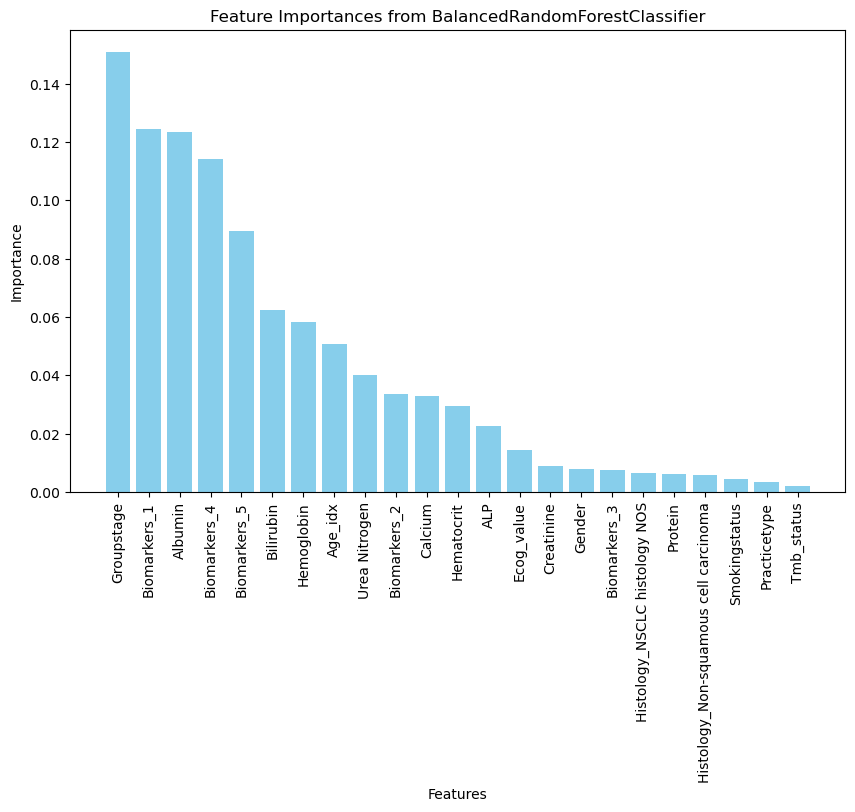

In [57]:
brf_model = BalancedRandomForestClassifier(random_state=42, n_estimators=100)
brf_model.fit(X_train_resampled, y_train_resampled)

y_pred_brf = brf_model.predict(X_test)
accuracy_brf = accuracy_score(y_test, y_pred_brf)

print("*********** Forward Selection ***********\n")
print("Balanced RandomForest Model Accuracy with Selected Features:", accuracy_brf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_brf))

importances = brf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances from BalancedRandomForestClassifier")
plt.bar(range(X_train_resampled.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(X_train_resampled.shape[1]), [df_encoded.columns[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

## ROC-AUC
The ROC (Receiver Operating Characteristic) curve and its associated AUC (Area Under the Curve) metric are widely used for evaluating the performance of binary classification models.
- **ROC Curve:** The ROC curve plots the True Positive Rate (Sensitivity or Recall) against the False Positive Rate (1 - Specificity) at different threshold levels. It helps visualize how well a classifier can separate the positive and negative classes, showing the trade-off between sensitivity and specificity.
- **AUC (Area Under the Curve):** AUC is a single scalar value that summarizes the ROC curve. It represents the probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance.

#### Interpreting the ROC Curve and AUC
- The closer the curve is to the top-left corner, the better the model's ability to distinguish between positive and negative classes.
- AUC provides a quick, summary metric: higher AUC indicates a better-performing model. When comparing multiple models on the same data, a higher AUC typically indicates a model with better discrimination ability.

To plot the ROC curve in Python:
- **Calculate** the TPR and FPR values across thresholds using roc_curve.
- **Plot** the ROC curve with TPR on the y-axis and FPR on the x-axis.
- **Calculate the AUC** score using roc_auc_score, which is often displayed in the legend or plot title.

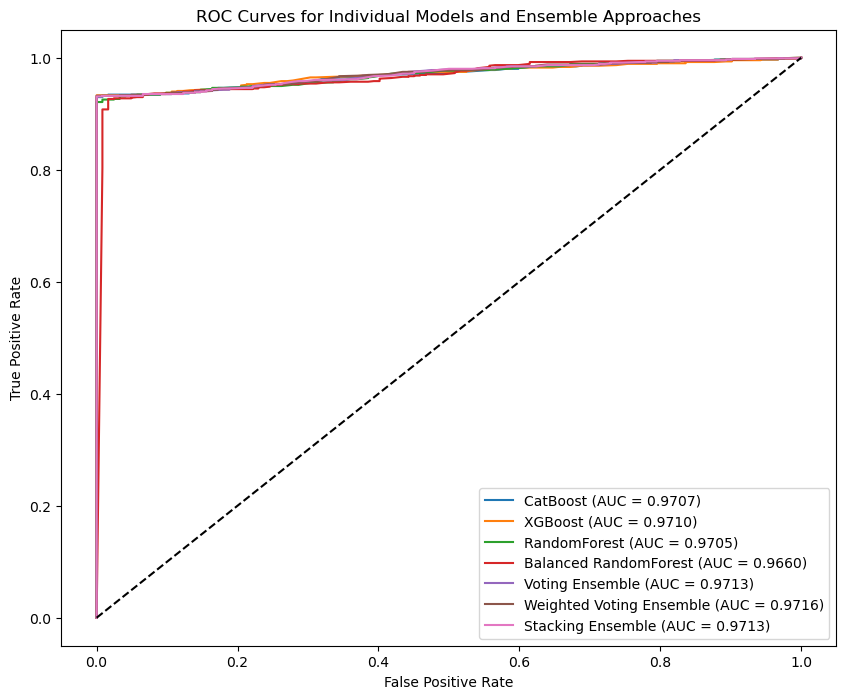

In [59]:
# CatBoost
y_pred_proba_catboost = catboost_model.predict_proba(X_test_selected_forward)[:, 1]
roc_auc_catboost = roc_auc_score(y_test, y_pred_proba_catboost)
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_pred_proba_catboost)

# XGBoost
y_pred_proba_xgboost = xgboost_model.predict_proba(X_test_selected_forward)[:, 1]
roc_auc_xgboost = roc_auc_score(y_test, y_pred_proba_xgboost)
fpr_xg, tpr_xg, _ = roc_curve(y_test, y_pred_proba_xgboost)

# RandomForest
y_pred_proba_rf = rf_model.predict_proba(X_test_selected_forward)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

# BalancedRandomForest
y_pred_proba_brf = brf_model.predict_proba(X_test)[:, 1]
roc_auc_brf = roc_auc_score(y_test, y_pred_proba_brf)
fpr_brf, tpr_brf, _ = roc_curve(y_test, y_pred_proba_brf)

# Voting Ensemble
y_pred_proba_voting = voting_ensemble.predict_proba(X_test_selected_forward)[:, 1]
roc_auc_voting = roc_auc_score(y_test, y_pred_proba_voting)
fpr_voting, tpr_voting, _ = roc_curve(y_test, y_pred_proba_voting)

# Weighted Voting Ensemble
y_pred_proba_weighted = voting_ensemble_weighted.predict_proba(X_test_selected_forward)[:, 1]
roc_auc_weighted = roc_auc_score(y_test, y_pred_proba_weighted)
fpr_weighted, tpr_weighted, _ = roc_curve(y_test, y_pred_proba_weighted)

# Stacking Ensemble
y_pred_proba_stacking = stacking_ensemble.predict_proba(X_test_selected_forward)[:, 1]
roc_auc_stacking = roc_auc_score(y_test, y_pred_proba_stacking)
fpr_stacking, tpr_stacking, _ = roc_curve(y_test, y_pred_proba_stacking)

plt.figure(figsize=(10, 8))

plt.plot(fpr_cat, tpr_cat, label=f'CatBoost (AUC = {roc_auc_catboost:.4f})')
plt.plot(fpr_xg, tpr_xg, label=f'XGBoost (AUC = {roc_auc_xgboost:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'RandomForest (AUC = {roc_auc_rf:.4f})')
plt.plot(fpr_brf, tpr_brf, label=f'Balanced RandomForest (AUC = {roc_auc_brf:.4f})')
plt.plot(fpr_voting, tpr_voting, label=f'Voting Ensemble (AUC = {roc_auc_voting:.4f})')
plt.plot(fpr_weighted, tpr_weighted, label=f'Weighted Voting Ensemble (AUC = {roc_auc_weighted:.4f})')
plt.plot(fpr_stacking, tpr_stacking, label=f'Stacking Ensemble (AUC = {roc_auc_stacking:.4f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Individual Models and Ensemble Approaches')
plt.legend()
plt.show()